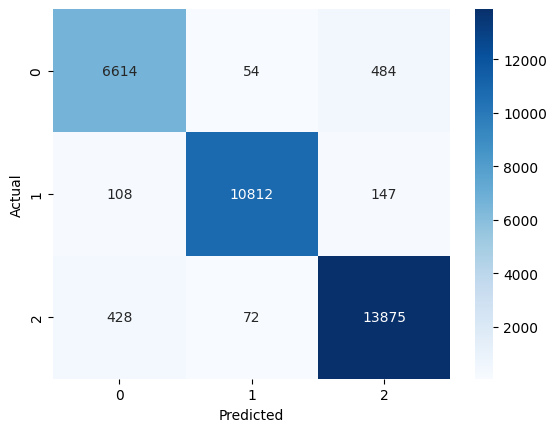

Accuracy: 0.9603301221083635
Precision: 0.960454760340058
Recall: 0.9603301221083635
F1 Score: 0.9603722514002795


In [ ]:
# SVM
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Twitter_Data.csv")

# Drop rows with missing values
data.dropna(subset=['sentiment', 'text'], inplace=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_raw = vectorizer.fit_transform(train_data['text']) # feature extraction done on tweets and stored that matrix in X_train_raw
y_train = train_data['sentiment'] # and the sentiment of it is as it is
X_test_raw = vectorizer.transform(test_data['text'])
y_test = test_data['sentiment']

# Apply feature selection to the training and testing data seperately
selector = SelectKBest(chi2, k=5000)
selector.fit(X_train_raw, y_train) # feature selection on feature extracted matrix and sentiment labled data
X_train = selector.transform(X_train_raw) # storde in X_train
X_test = selector.transform(X_test_raw)

# Train the SVM model
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


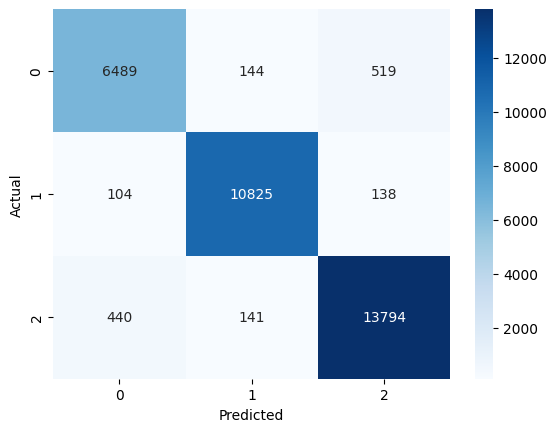

Accuracy: 0.9544087868932932
Precision: 0.9542662366099346
Recall: 0.9544087868932932
F1 Score: 0.9543192017861347


In [ ]:
# logistic regression
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Twitter_Data.csv")

# Drop rows with missing values
data.dropna(subset=['sentiment', 'text'], inplace=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_raw = vectorizer.fit_transform(train_data['text'])
y_train = train_data['sentiment']
X_test_raw = vectorizer.transform(test_data['text'])
y_test = test_data['sentiment']

# Apply feature selection to the training and testing data separately
selector = SelectKBest(chi2, k=5000)
selector.fit(X_train_raw, y_train)
X_train = selector.transform(X_train_raw)
X_test = selector.transform(X_test_raw)

# Train the logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


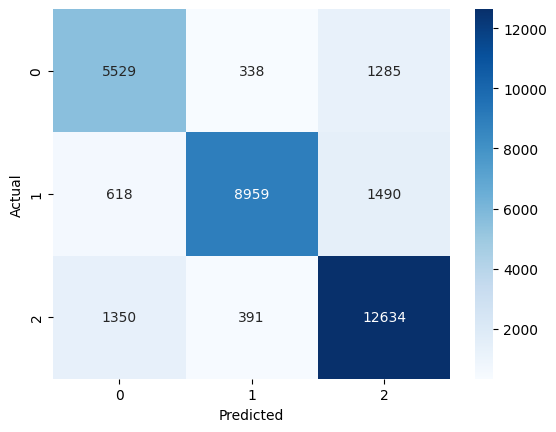

Accuracy: 0.8321163404307541
Precision: 0.8374243790334839
Recall: 0.8321163404307541
F1 Score: 0.832927177122663


In [ ]:
# Naive Bayes
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Twitter_Data.csv")

# Drop rows with missing values
data.dropna(subset=['sentiment', 'text'], inplace=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['text'])
y_train = train_data['sentiment']
X_test = vectorizer.transform(test_data['text'])
y_test = test_data['sentiment']

# Perform feature selection using chi-squared test
selector = SelectKBest(chi2, k=5000)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Train the Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


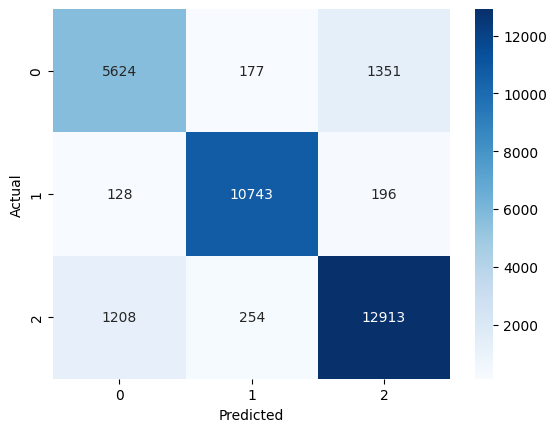

Accuracy: 0.8983248450635086
Precision: 0.8975997332202277
Recall: 0.8983248450635086
F1 Score: 0.8979188841360869


In [ ]:
# decision tree
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Twitter_Data.csv")

# Drop rows with missing values
data.dropna(subset=['sentiment', 'text'], inplace=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Vectorize the text data and select top 5000 features using chi-squared test
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(train_data['text'])
selector = SelectKBest(chi2, k=5000)
X_train = selector.fit_transform(X_train_counts, train_data['sentiment'])
y_train = train_data['sentiment']
X_test_counts = vectorizer.transform(test_data['text'])
X_test = selector.transform(X_test_counts)
y_test = test_data['sentiment']

# Train the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


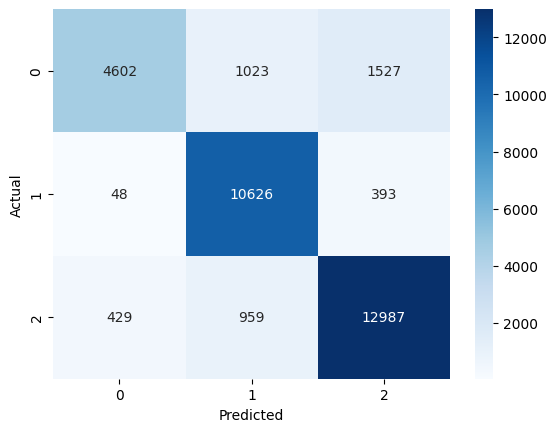

Accuracy: 0.865650119653924
Precision: 0.8692115309374043
Recall: 0.865650119653924
F1 Score: 0.8611212874220231


In [ ]:
# random forest
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Twitter_Data.csv")

# Drop rows with missing values
data.dropna(subset=['sentiment', 'text'], inplace=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Vectorize the text data and select top 5000 features using chi-squared test
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(train_data['text'])
selector = SelectKBest(chi2, k=5000)
X_train = selector.fit_transform(X_train_counts, train_data['sentiment'])
y_train = train_data['sentiment']
X_test_counts = vectorizer.transform(test_data['text'])
X_test = selector.transform(X_test_counts)
y_test = test_data['sentiment']

# Train the random forest model
clf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


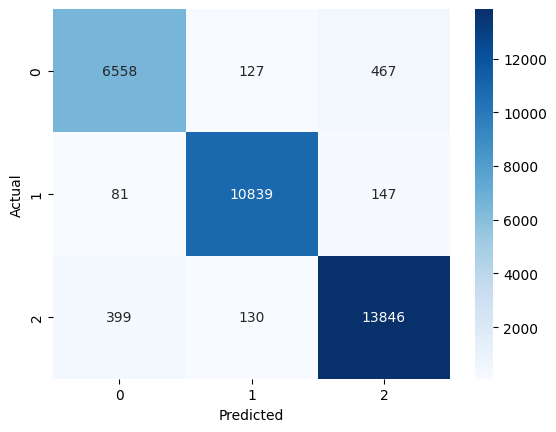

Accuracy: 0.9585506534945082
Precision: 0.9584434562916935
Recall: 0.9585506534945082
F1 Score: 0.9584797145065831


In [ ]:
# xgboost
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Twitter_Data.csv")

# Drop rows with missing values
data.dropna(subset=['sentiment', 'text'], inplace=True)

# Convert sentiment labels to 0, 1, and 2
le = LabelEncoder()
data['sentiment'] = le.fit_transform(data['sentiment'])

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Vectorize the text data and select top 5000 features using chi-squared test
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(train_data['text'])
selector = SelectKBest(chi2, k=5000)
X_train = selector.fit_transform(X_train_counts, train_data['sentiment'])
y_train = train_data['sentiment']
X_test_counts = vectorizer.transform(test_data['text'])
X_test = selector.transform(X_test_counts)
y_test = test_data['sentiment']

# Train the xgboost model
clf = XGBClassifier(n_estimators=10000, learning_rate=0.05, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


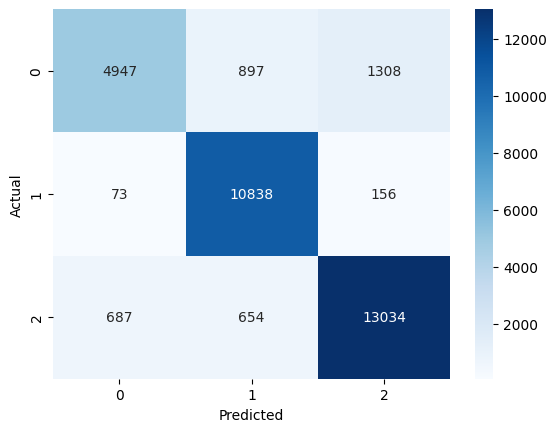

Accuracy: 0.8841811376326931
Precision: 0.8837360726991819
Recall: 0.8841811376326931
F1 Score: 0.8807922742811931


In [ ]:
# AdaBoost
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Twitter_Data.csv")

# Drop rows with missing values
data.dropna(subset=['sentiment', 'text'], inplace=True)

# Convert sentiment labels to 0, 1, and 2
le = LabelEncoder()
data['sentiment'] = le.fit_transform(data['sentiment'])

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Vectorize the text data and select top 5000 features using chi-squared test
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(train_data['text'])
selector = SelectKBest(chi2, k=5000)
X_train = selector.fit_transform(X_train_counts, train_data['sentiment'])
y_train = train_data['sentiment']
X_test_counts = vectorizer.transform(test_data['text'])
X_test = selector.transform(X_test_counts)
y_test = test_data['sentiment']

# Train the AdaBoost model
clf = AdaBoostClassifier(n_estimators=10000, learning_rate=0.05, random_state=42)
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


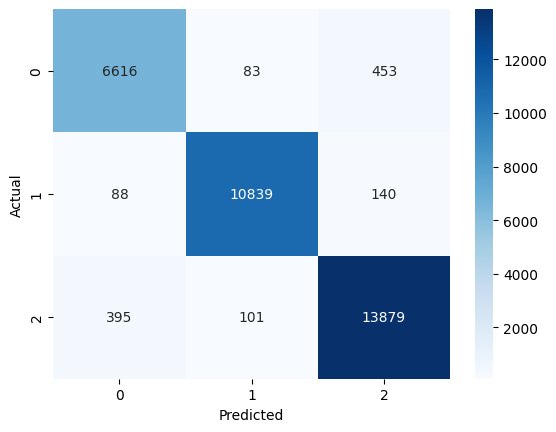

Accuracy: 0.9613425783886604
Precision: 0.9613313547137007
Recall: 0.9613425783886604
F1 Score: 0.9613280280848137


In [ ]:
# gradient boosting
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Twitter_Data.csv")

# Drop rows with missing values
data.dropna(subset=['sentiment', 'text'], inplace=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Vectorize the text data and select top 5000 features using chi-squared test
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(train_data['text'])
selector = SelectKBest(chi2, k=5000)
X_train = selector.fit_transform(X_train_counts, train_data['sentiment'])
y_train = train_data['sentiment']
X_test_counts = vectorizer.transform(test_data['text'])
X_test = selector.transform(X_test_counts)
y_test = test_data['sentiment']

# Train the gradient boosting model
clf = GradientBoostingClassifier(n_estimators=10000, random_state=42)
clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

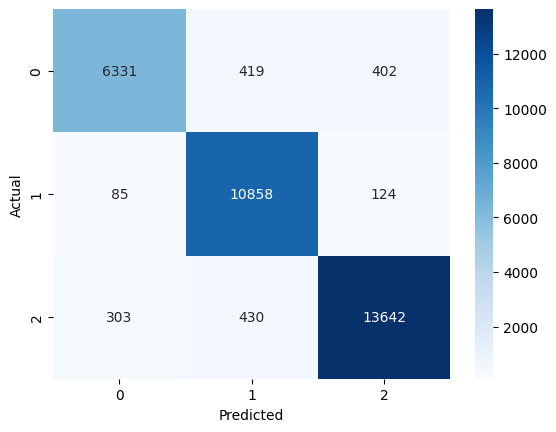

Accuracy: 0.945910290237467
Precision: 0.9463313455228622
Recall: 0.945910290237467
F1 Score: 0.9456473770814259


In [ ]:
# Weighted averaging  ( Blending ) , logistic regression, linear SVM, Naive Bayes, and Decision Tree
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
data = pd.read_csv("Twitter_Data.csv").dropna(subset=['sentiment', 'text'])

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['text'])
X_test = vectorizer.transform(test_data['text'])
y_train = train_data['sentiment']
y_test = test_data['sentiment']

# Use feature selection to select the top 1000 most informative features
selector = SelectKBest(chi2, k=5000)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Train individual models for logistic regression, linear SVM, Naive Bayes, and Decision Tree
lr_model = LogisticRegression(C=0.8, max_iter=1000)
svm_model = LinearSVC(C=0.8, max_iter=10000)
nb_model = MultinomialNB(alpha=0.1)
dt_model = DecisionTreeClassifier()

# Train the models on the training data and make predictions on the test data
lr_pred = lr_model.fit(X_train, y_train).predict(X_test)
svm_pred = svm_model.fit(X_train, y_train).predict(X_test)
nb_pred = nb_model.fit(X_train, y_train).predict(X_test)
dt_pred = dt_model.fit(X_train, y_train).predict(X_test)

# Combine the individual model predictions using blending
# Use a weighted average with weights [0.4, 0.5, 0.2, 0.3] for logistic regression, linear SVM, Naive Bayes, and Decision Tree respectively
ensemble_pred = 0.5 * svm_pred + 0.4 * lr_pred + 0.3 * dt_pred + 0.2 * nb_pred
ensemble_pred = np.round(ensemble_pred).astype(int)

# Create a confusion matrix
cm = confusion_matrix(y_test, ensemble_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, ensemble_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1 score
report = classification_report(y_test, ensemble_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
